# Sorghum Yield Predictions with Ensemble Models

In [89]:
#important libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,\
StackingRegressor,VotingRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold
from matplotlib import pyplot
from scipy.stats import sem
from numpy import mean
from numpy import std

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

## Import Train and Test Data

In [90]:
df = pd.read_csv('../../../data/data-1.5-yellow.csv',index_col = 0)
df.head()

PlotID Treatment         PI       CHL       EWT       LWC        SLA  \
0    5001        HN  PI 656057  467.6750  0.048621  0.816438  91.477861   
1    5002        HN  PI 656011  512.3625  0.043236  0.768144  76.626487   
2    5003        HN  PI 576347  606.6625  0.033848  0.751805  89.492182   
3    5014        HN  PI 534117       NaN       NaN       NaN        NaN   
4    5015        HN     BTx623       NaN       NaN       NaN        NaN   

       N      P     K     Mg     Ca      S     Fe    Mn    B    Cu    Zn  \
0  3.612  0.381  1.93  0.245  0.674  0.206  171.0  31.0  6.4  17.6  28.0   
1  2.916  0.387  2.24  0.143  0.447  0.196  134.0  34.0  4.6  12.5  27.0   
2  3.749  0.492  1.54  0.260  0.583  0.196  159.0  36.0  5.1  15.4  32.0   
3    NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   NaN   
4    NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   NaN   

       X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.133649  0.113164  0.095398  0.095292  0.097985  0.089531  0.085457   
3  0.119853  0.089598  0.093482  0.111414  0.079122  0.059123  0.080614   
4  0.087480  0.102200  0.112072  0.109021  0.096971  0.088650  0.079650   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.086694  0.082119  0.090674  0.082183  0.057630  0.074017  0.063699   
3  0.111972  0.087410  0.104930  0.096836  0.053224  0.080590  0.084966   
4  0.069502  0.061583  0.063581  0.063916  0.057499  0.052230  0.050146   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.056483  0.072555  0.051468  0.052361  0.063759  0.055830  0.039474   
3  0.075567  0.074128  0.078823  0.067031  0.053021  0.057072  0.060873   
4  0.051929  0.057628  0.068537  0.071899  0.064342  0.049210  0.040311   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.044329  0.059886  0.055076  0.055611  0.054215  0.045810  0.032091   
3  0.065333  0.067081  0.061981  0.071762  0.075621  0.067405  0.063775   
4  0.043344  0.052114  0.055250  0.051213  0.045734  0.043992  0.048554   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.028689  0.033169  0.038722  0.042077  0.040161  0.037917  0.041208   
3  0.060381  0.061531  0.067389  0.065502  0.061511  0.059425  0.060912   
4  0.051052  0.050399  0.048936  0.053607  0.054198  0.049047  0.042811   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.046213  0.048145  0.046461  0.043884  0.043052  0.039607  0.035373   
3  0.060602  0.060764  0.061790  0.062637  0.064547  0.063739  0.060583   
4  0.053208  0.055781  0.048785  0.046415  0.043908  0.047679  0.054650   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.041091  0.045182  0.045669  0.043754  0.042794  0.041254  0.040067   
3  0.061476  0.058410  0.057525  0.062045  0.058640  0.057564  0.058823   
4  0.048783  0

In [91]:
df.shape

(834, 2170)

### Calculate Principal Components

In [92]:
sub = df[df.columns[18:-8]] #reflectance data
sub.head()

X350      X351      X352      X353      X354      X355      X356  \
0  0.085242  0.084198  0.073049  0.062852  0.071412  0.076959  0.086402   
1  0.053529  0.087761  0.089831  0.066536  0.070464  0.065440  0.057905   
2  0.133649  0.113164  0.095398  0.095292  0.097985  0.089531  0.085457   
3  0.119853  0.089598  0.093482  0.111414  0.079122  0.059123  0.080614   
4  0.087480  0.102200  0.112072  0.109021  0.096971  0.088650  0.079650   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.089655  0.068680  0.077627  0.075629  0.049378  0.047664  0.048732   
1  0.061879  0.087529  0.083688  0.066741  0.054267  0.042131  0.050978   
2  0.086694  0.082119  0.090674  0.082183  0.057630  0.074017  0.063699   
3  0.111972  0.087410  0.104930  0.096836  0.053224  0.080590  0.084966   
4  0.069502  0.061583  0.063581  0.063916  0.057499  0.052230  0.050146   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.053430  0.059725  0.043177  0.055788  0.069612  0.049814  0.054452   
1  0.056994  0.045107  0.046368  0.043490  0.042569  0.050927  0.046258   
2  0.056483  0.072555  0.051468  0.052361  0.063759  0.055830  0.039474   
3  0.075567  0.074128  0.078823  0.067031  0.053021  0.057072  0.060873   
4  0.051929  0.057628  0.068537  0.071899  0.064342  0.049210  0.040311   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.055179  0.045720  0.038621  0.047542  0.053812  0.049443  0.042255   
1  0.041853  0.043365  0.048262  0.047062  0.048264  0.051650  0.044692   
2  0.044329  0.059886  0.055076  0.055611  0.054215  0.045810  0.032091   
3  0.065333  0.067081  0.061981  0.071762  0.075621  0.067405  0.063775   
4  0.043344  0.052114  0.055250  0.051213  0.045734  0.043992  0.048554   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.043361  0.048633  0.051029  0.044424  0.043408  0.041854  0.032599   
1  0.043194  0.040966  0.035022  0.041995  0.044352  0.042166  0.041462   
2  0.028689  0.033169  0.038722  0.042077  0.040161  0.037917  0.041208   
3  0.060381  0.061531  0.067389  0.065502  0.061511  0.059425  0.060912   
4  0.051052  0.050399  0.048936  0.053607  0.054198  0.049047  0.042811   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.041451  0.048299  0.048850  0.050056  0.046709  0.043648  0.042465   
1  0.043841  0.043980  0.042063  0.041588  0.038251  0.035009  0.034469   
2  0.046213  0.048145  0.046461  0.043884  0.043052  0.039607  0.035373   
3  0.060602  0.060764  0.061790  0.062637  0.064547  0.063739  0.060583   
4  0.053208  0.055781  0.048785  0.046415  0.043908  0.047679  0.054650   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.038687  0.046113  0.051060  0.044858  0.047175  0.049994  0.049110   
1  0.037531  0.040736  0.042420  0.042195  0.041240  0.040235  0.039823   
2  0.041091  0.045182  0.045669  0.043754  0.042794  0.041254  0.040067   
3  0.061476  0.058410  0.057525  0.062045  0.058640  0.057564  0.058823   
4  0.048783  0.052314  0.054007  0.045919  0.048827  0.052774  0.054797   

       X399      X400      X401      X402      X403      X404      X405  \
0  0.043823  0.043862  0.041952  0.039572  0.044624  0.044988  0.046128   
1  0.040379  0.041654  0.042781  0.042810  0.041331  0.044993  0.048847   
2  0.040752  0.043151  0.043261  0.042180  0.044544  0.044126  0.043205   
3  0.058657  0.056359  0.056490  0.059140  0.060611  0.057030  0.055395   
4  0.054688  0.052701  0.053489  0.055446  0.052672  0.051452  0.052453   

       X406      X407      X408      X409      X410      X411      X412  \
0  0.048967  0.043201  0.043568  0.048380  0.051787  0.049475  0.048316   
1  0.048443  0.042648  0.044995  0.048170  0.044979  0.047369  0.049684   
2  0.043584  0.044392  0.045137  0.045063  0.044390  0.046864  0.045013   
3  0.058313  0.059271  0.057111  0.056335  0.059869  0.060999  0.058410   
4  0.054213  0.053440  0

In [93]:
n_components =15
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.596076 -0.028881 -0.042526  0.075948 -0.003397 -0.018632 -0.068217   
1 -0.201372  0.474431 -0.179717  0.040637 -0.047434  0.119273 -0.036458   
2  0.087847 -0.413801 -0.093993  0.047796 -0.015946  0.017348  0.047151   
3  0.854951 -0.056437 -0.292063  0.167698 -0.103440  0.032768 -0.018716   
4 -0.473076  0.092117 -0.195046  0.085198  0.002259  0.010396  0.019990   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.030668  0.000361  0.014789  0.006653  0.027405 -0.021476  0.015263   
1 -0.016229  0.019511  0.029504 -0.031811 -0.018692 -0.012641  0.018130   
2 -0.023257  0.025712  0.025074  0.004717 -0.002084 -0.018524  0.035759   
3  0.011321  0.012132 -0.058643  0.026518  0.025215  0.009463  0.012125   
4 -0.020563 -0.000088 -0.007487  0.008906 -0.024468  0.035606 -0.008995   

       PC15  
0  0.035705  
1  0.027905  
2  0.026113  
3 -0.003217  
4  0.004730

<AxesSubplot:>

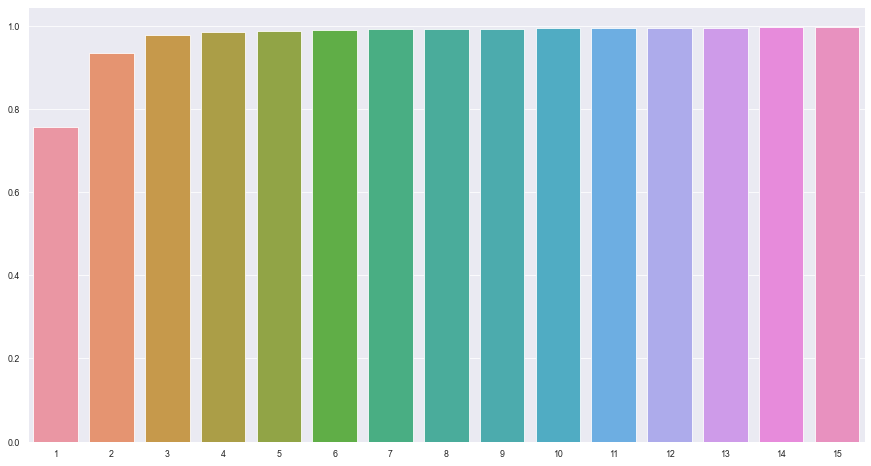

In [94]:
total_var = pca.explained_variance_ratio_.sum() * 100
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (15,8))
sns.set_context('paper')
sns.barplot(x = list(range(1,n_components+1,1)), y = exp_var_cumul)

In [95]:
total_var #explained variance

99.70368164870816

In [96]:
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment

In [97]:
sub_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.596076 -0.028881 -0.042526  0.075948 -0.003397 -0.018632 -0.068217   
1 -0.201372  0.474431 -0.179717  0.040637 -0.047434  0.119273 -0.036458   
2  0.087847 -0.413801 -0.093993  0.047796 -0.015946  0.017348  0.047151   
3  0.854951 -0.056437 -0.292063  0.167698 -0.103440  0.032768 -0.018716   
4 -0.473076  0.092117 -0.195046  0.085198  0.002259  0.010396  0.019990   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.030668  0.000361  0.014789  0.006653  0.027405 -0.021476  0.015263   
1 -0.016229  0.019511  0.029504 -0.031811 -0.018692 -0.012641  0.018130   
2 -0.023257  0.025712  0.025074  0.004717 -0.002084 -0.018524  0.035759   
3  0.011321  0.012132 -0.058643  0.026518  0.025215  0.009463  0.012125   
4 -0.020563 -0.000088 -0.007487  0.008906 -0.024468  0.035606 -0.008995   

       PC15  DaysToBloom treatment  
0  0.035705         83.0        HN  
1  0.027905         76.0        HN  
2  0.026113         53.0        HN  
3 -0.003217         55.0        HN  
4  0.004730         62.0        HN

In [98]:
sub_df.shape

(834, 17)

### Train Test Split

In [99]:
#df.rename(columns = {'Treatment':'treatment'},inplace = True)

In [100]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 583 row/records. F: 210 and N: 373

Train Dataset: 251 row/records. F: 91 and N: 160


In [101]:
#features
features = list(sub_df.columns)[:-2]

## Important Functions

In [102]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    estimators= 100
    model = RandomForestRegressor(n_estimators = estimators)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

## RF  - Both Treatment

In [103]:
#check the head of training dataset
train_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
117  1.591987 -0.124201  0.298157  0.140578  0.017101 -0.007470 -0.004420   
256  0.037579 -0.475413 -0.037469  0.041053  0.025472  0.026973 -0.001961   
506 -0.517255  0.019193 -0.122909 -0.040039 -0.109323  0.008032  0.026026   
276 -0.492515 -0.486928 -0.262172 -0.118029  0.034616  0.020582  0.041668   
166 -0.688065 -0.047516 -0.310948  0.046539 -0.011115  0.033063  0.011741   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
117  0.023770 -0.005748  0.036541  0.016121  0.008142 -0.009831  0.025277   
256 -0.037218  0.004402  0.010144 -0.040068 -0.000614 -0.002041  0.080485   
506 -0.039063 -0.015077  0.031979 -0.000339  0.015463 -0.028374 -0.007075   
276 -0.033510  0.008813  0.036528  0.020528  0.023870 -0.004218  0.002021   
166  0.014532  0.031163 -0.054476  0.030479  0.021708 -0.013607 -0.017816   

         PC15 treatment  DaysToBloom  
117 -0.014875        HN         76.0  
256  0.009355        HN         61.0  
506  0.041327        LN         63.0  
276  0.023924        HN         60.0  
166 -0.018362        HN         59.0

In [104]:
sub_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.596076 -0.028881 -0.042526  0.075948 -0.003397 -0.018632 -0.068217   
1 -0.201372  0.474431 -0.179717  0.040637 -0.047434  0.119273 -0.036458   
2  0.087847 -0.413801 -0.093993  0.047796 -0.015946  0.017348  0.047151   
3  0.854951 -0.056437 -0.292063  0.167698 -0.103440  0.032768 -0.018716   
4 -0.473076  0.092117 -0.195046  0.085198  0.002259  0.010396  0.019990   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.030668  0.000361  0.014789  0.006653  0.027405 -0.021476  0.015263   
1 -0.016229  0.019511  0.029504 -0.031811 -0.018692 -0.012641  0.018130   
2 -0.023257  0.025712  0.025074  0.004717 -0.002084 -0.018524  0.035759   
3  0.011321  0.012132 -0.058643  0.026518  0.025215  0.009463  0.012125   
4 -0.020563 -0.000088 -0.007487  0.008906 -0.024468  0.035606 -0.008995   

       PC15  DaysToBloom treatment  
0  0.035705         83.0        HN  
1  0.027905         76.0        HN  
2  0.026113         53.0        HN  
3 -0.003217         55.0        HN  
4  0.004730         62.0        HN

In [105]:
## Initialize Models with default parameters
X = sub_df[list(sub_df.columns)[:-2]]
y = sub_df['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# scores

>1 mean=0.1953 se=0.031
>2 mean=0.2028 se=0.020
>3 mean=0.1914 se=0.017
>4 mean=0.2023 se=0.016
>5 mean=0.2010 se=0.014


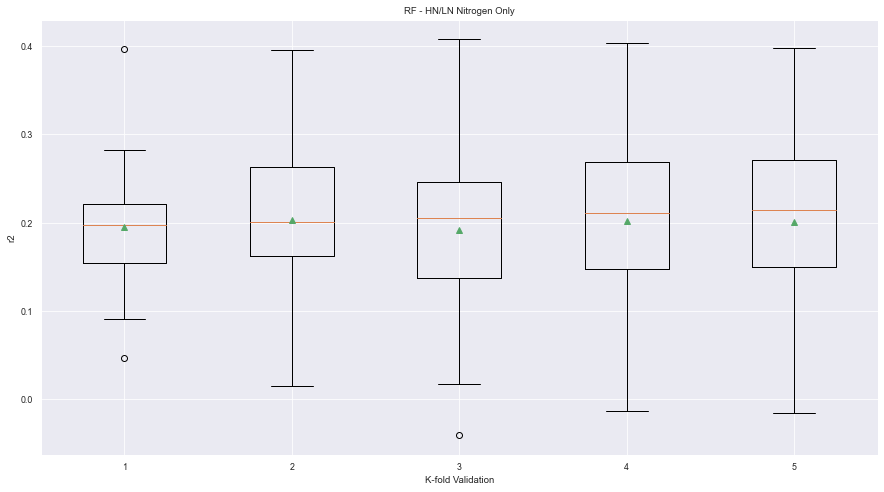

In [106]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - HN/LN Nitrogen Only")
pyplot.show()

## RF - Full Nitrogen


In [107]:
X = sub_df[sub_df.treatment =="HN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="HN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=0.0823 se=0.044
>2 mean=0.1091 se=0.030
>3 mean=0.1056 se=0.024
>4 mean=0.0990 se=0.020
>5 mean=0.1079 se=0.021


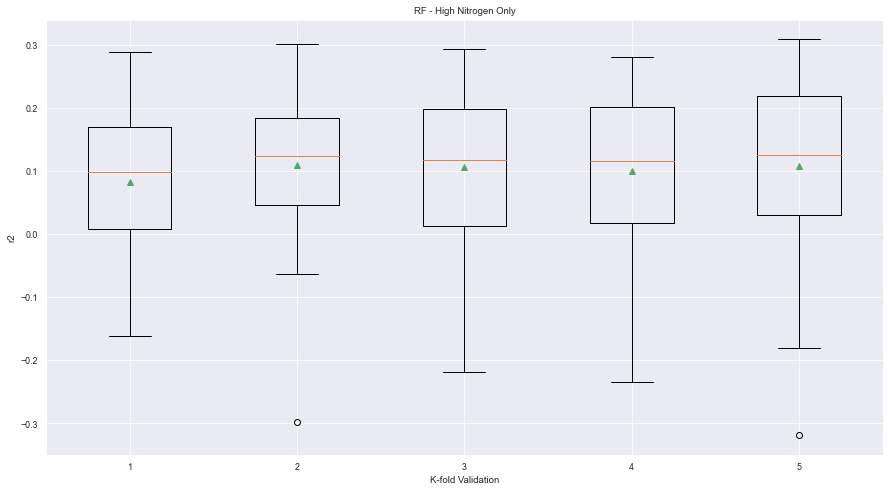

In [108]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - High Nitrogen Only")
pyplot.show()

## RF - Nitrogen Deprived

In [109]:
X = sub_df[sub_df.treatment =="LN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="LN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=0.1871 se=0.037
>2 mean=0.1946 se=0.022
>3 mean=0.1901 se=0.018
>4 mean=0.1896 se=0.014
>5 mean=0.1859 se=0.012


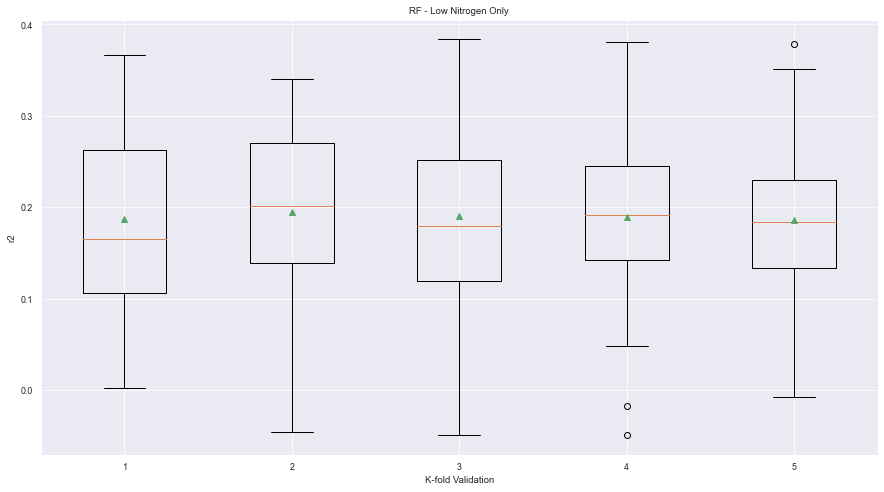

In [110]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - Low Nitrogen Only")
pyplot.show()